In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_amazon_delivery.csv")
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,5,3,1,11,0
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,4,3,0,19,1
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,5,3,1,8,1
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,1,4,0,18,1
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,5,3,1,13,0


## # 1. Data Overview

In [8]:
df.shape

(39997, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Agent_Age        39997 non-null  int64  
 1   Agent_Rating     39997 non-null  float64
 2   Weather          39997 non-null  object 
 3   Traffic          39997 non-null  object 
 4   Vehicle          39997 non-null  object 
 5   Area             39997 non-null  object 
 6   Delivery_Time    39997 non-null  int64  
 7   Category         39997 non-null  object 
 8   distance_km      39997 non-null  float64
 9   order_dayofweek  39997 non-null  int64  
 10  order_month      39997 non-null  int64  
 11  is_weekend       39997 non-null  int64  
 12  order_hour       39997 non-null  int64  
 13  is_rush_hour     39997 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 4.3+ MB


In [7]:
df.describe()

,Agent_Age,Agent_Rating,Delivery_Time,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour
count,39997.000000,39997.000000,39997.000000,39997.000000,39997.000000,39997.000000,39997.000000,39997.000000,39997.000000
mean,29.552366,4.634068,125.100483,9.716279,2.995125,3.002200,0.275421,17.422282,0.549516
std,5.761967,0.314774,51.938894,5.598359,1.970200,0.532422,0.446732,4.816805,0.497548
min,20.000000,2.500000,10.000000,1.465067,0.000000,2.000000,0.000000,0.000000,0.000000
25%,25.000000,4.500000,90.000000,4.657655,1.000000,3.000000,0.000000,15.000000,0.000000
50%,30.000000,4.700000,125.000000,9.193021,3.000000,3.000000,0.000000,19.000000,1.000000
75%,35.000000,4.900000,160.000000,13.631440,5.000000,3.000000,1.000000,21.000000,1.000000
max,39.000000,5.000000,270.000000,20.969489,6.000000,4.000000,1.000000,23.000000,1.000000


## 2. Target Variable (Delivery_Time)

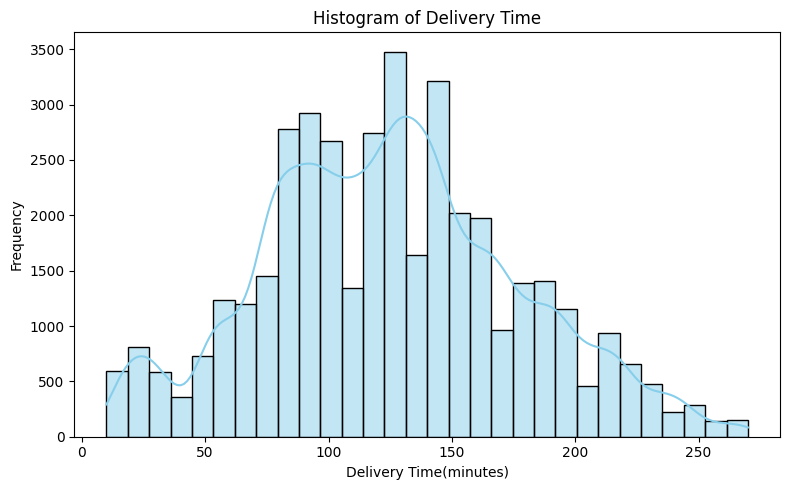

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['Delivery_Time'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Delivery Time")
plt.xlabel("Delivery Time(minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

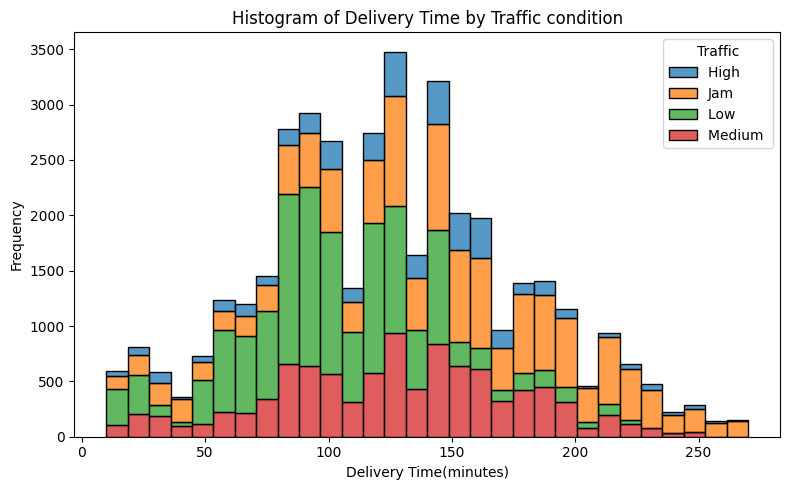

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x = 'Delivery_Time', bins=30, hue='Traffic', multiple='stack')
plt.title("Histogram of Delivery Time by Traffic condition")
plt.xlabel("Delivery Time(minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

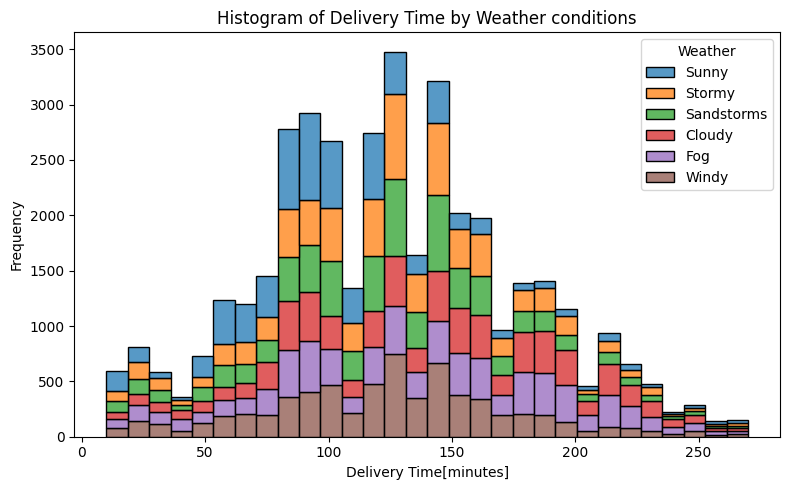

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Delivery_Time', bins=30, hue='Weather', multiple='stack')
plt.title("Histogram of Delivery Time by Weather conditions")
plt.xlabel("Delivery Time[minutes]")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

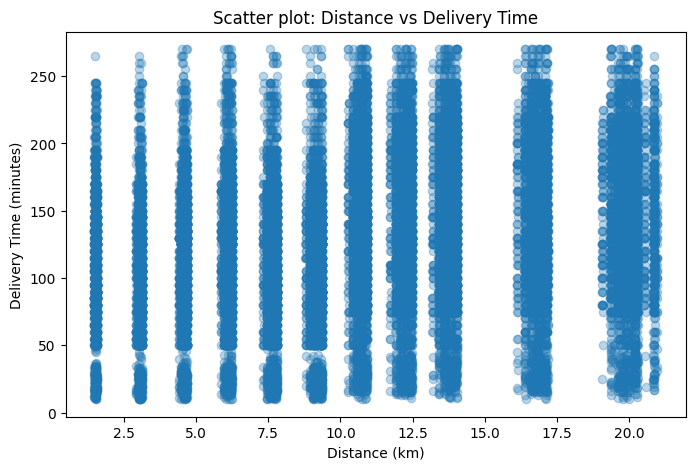

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(df['distance_km'], df['Delivery_Time'],  alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Scatter plot: Distance vs Delivery Time")
plt.show()

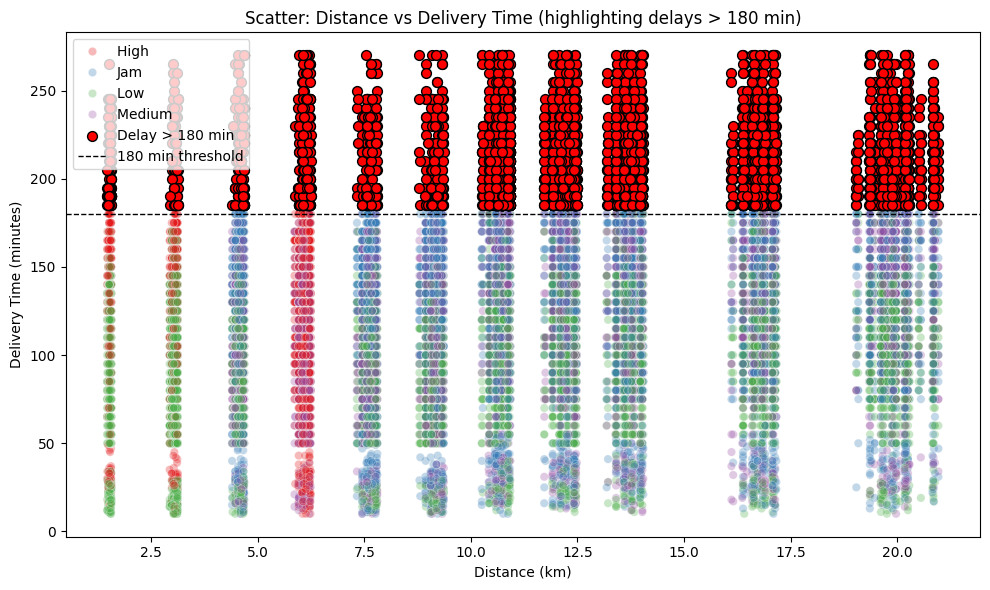

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Base scatter (all deliveries)
sns.scatterplot(
    data=df, x='distance_km', y='Delivery_Time',
    hue='Traffic', alpha=0.3, palette='Set1'
)

# Highlight deliveries where Delivery_Time > 180
outliers = df[df['Delivery_Time'] > 180]
plt.scatter(
    outliers['distance_km'], outliers['Delivery_Time'],
    color='red', edgecolor='black', s=50, label='Delay > 180 min'
)

plt.axhline(180, color='black', linestyle='--', linewidth=1, label='180 min threshold')
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.title("Scatter: Distance vs Delivery Time (highlighting delays > 180 min)")
plt.legend()
plt.tight_layout()
plt.show()

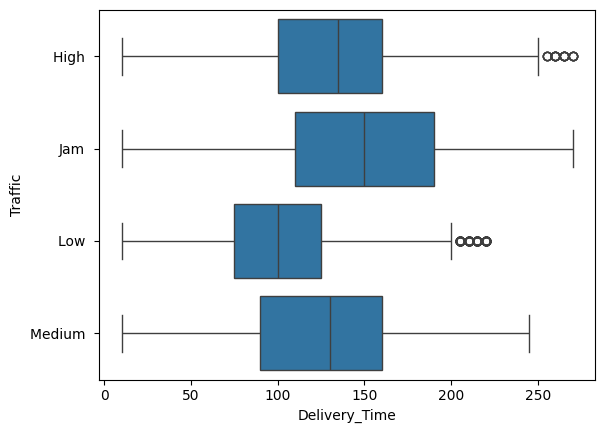

In [30]:
sns.boxplot(data=df, x='Delivery_Time', y='Traffic')
plt.show();

In [31]:
df.groupby("Traffic")['Delivery_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Traffic,,,,,,,,
High,3933.0,129.464277,48.266971,10.0,100.0,135.0,160.0,270.0
Jam,12610.0,147.958525,56.729707,10.0,110.0,150.0,190.0,270.0
Low,13699.0,101.452150,38.852382,10.0,75.0,100.0,125.0,220.0
Medium,9755.0,127.002665,48.684389,10.0,90.0,130.0,160.0,245.0


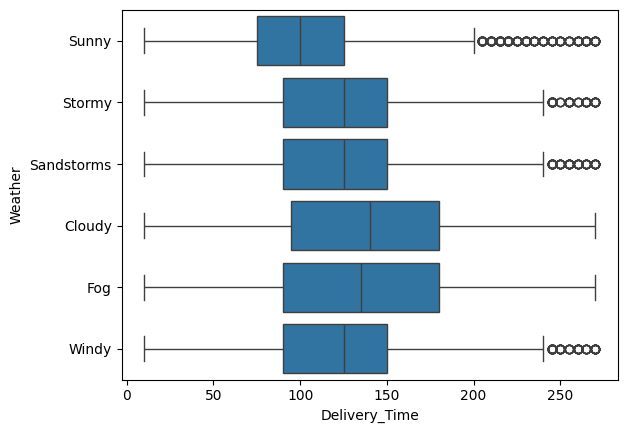

In [32]:
sns.boxplot(data=df, x ='Delivery_Time', y = 'Weather')
plt.show();

In [37]:
sunny_outliers = df[(df['Weather'] == 'Sunny') & (df['Delivery_Time'] > 200)]
sunny_outliers.shape

(279, 14)

In [41]:
stormy_outliers = df[(df['Weather'] == 'Stormy') & (df['Delivery_Time'] > 200)]
stormy_outliers

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance_km,order_dayofweek,order_month,is_weekend,order_hour,is_rush_hour
161,38,3.9,Stormy,Jam,motorcycle,Metropolitian,210,Kitchen,12.100062,6,3,1,19,1
246,38,4.1,Stormy,High,motorcycle,Metropolitian,205,Kitchen,1.552700,5,3,1,11,0
251,31,4.4,Stormy,Jam,motorcycle,Urban,235,Books,16.660108,6,3,1,21,1
261,39,4.0,Stormy,Medium,motorcycle,Metropolitian,240,Jewelry,20.206582,4,3,0,17,0
631,31,4.4,Stormy,Jam,motorcycle,Metropolitian,265,Outdoors,10.756273,4,3,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39067,31,4.5,Stormy,Jam,motorcycle,Metropolitian,215,Cosmetics,13.971217,6,3,1,19,1
39188,32,4.9,Stormy,Jam,motorcycle,Urban,220,Apparel,7.761200,0,3,0,21,1
39285,31,4.0,Stormy,Jam,motorcycle,Urban,265,Skincare,19.760081,4,3,0,20,1
39467,31,4.9,Stormy,High,motorcycle,Metropolitian,205,Sports,3.105493,3,3,0,11,0


In [39]:
windy_outliers = df[(df['Weather'] == 'Windy') & (df['Delivery_Time'] > 200)]
windy_outliers.shape

(384, 14)

In [40]:
sandstorms_outliers = df[(df['Weather'] == 'Sandstorms') & (df['Delivery_Time'] > 200)]
sandstorms_outliers.shape

(401, 14)

## 3. Numerical Features

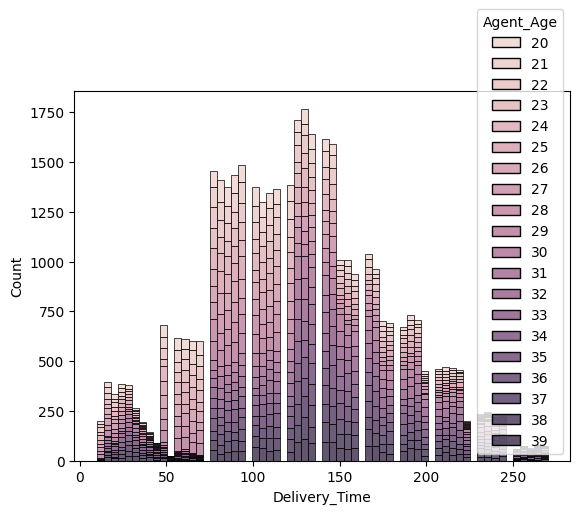

In [44]:
sns.histplot(data=df, x='Delivery_Time', hue='Agent_Age', multiple='stack')
plt.show()

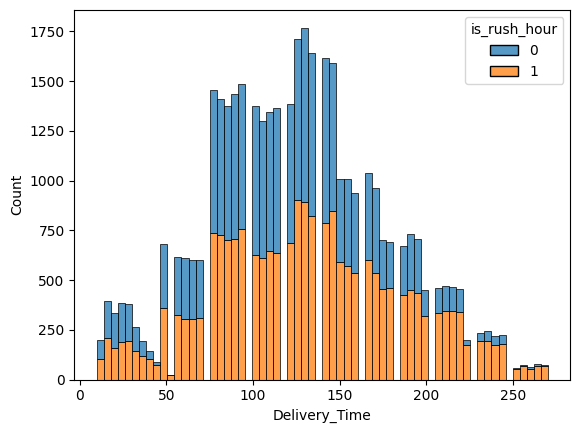

In [48]:
sns.histplot(data=df, x='Delivery_Time', hue='is_rush_hour', multiple='stack')
plt.show()

## 4. Categorical Features

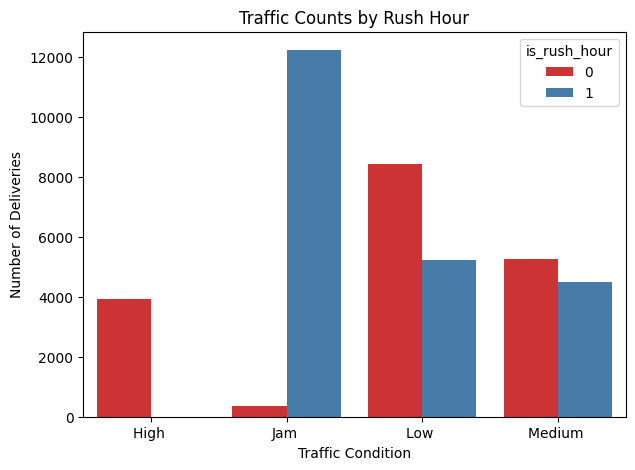

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Traffic', hue='is_rush_hour', palette='Set1')
plt.title("Traffic Counts by Rush Hour")
plt.xlabel("Traffic Condition")
plt.ylabel("Number of Deliveries")
plt.show()

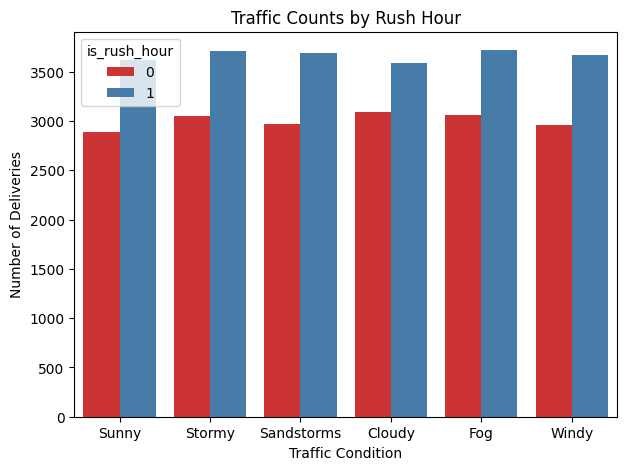

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Weather', hue='is_rush_hour', palette='Set1')
plt.title("Traffic Counts by Rush Hour")
plt.xlabel("Traffic Condition")
plt.ylabel("Number of Deliveries")
plt.show()

In [53]:
# Using group by function
df.groupby('Traffic')['Delivery_Time'].mean().sort_values()

Traffic
Low        101.452150
Medium     127.002665
High       129.464277
Jam        147.958525
Name: Delivery_Time, dtype: float64

In [54]:
df.groupby('Weather')['Delivery_Time'].mean().sort_values()

Weather
Sunny         103.882380
Sandstorms    123.303969
Stormy        123.438212
Windy         123.971165
Fog           136.947818
Cloudy        138.325944
Name: Delivery_Time, dtype: float64

In [55]:
df.groupby("Area")['Delivery_Time'].mean()

Area
Metropolitian     129.864679
Other             104.501908
Semi-Urban        238.717391
Urban             109.662077
Name: Delivery_Time, dtype: float64

In [56]:
df.groupby("Vehicle")['Delivery_Time'].mean()

Vehicle
motorcycle     131.134746
scooter        116.618057
van            116.216981
Name: Delivery_Time, dtype: float64

In [58]:
df.groupby('is_rush_hour')['Delivery_Time'].mean()

is_rush_hour
0    117.792374
1    131.091542
Name: Delivery_Time, dtype: float64

In [59]:
df.groupby("Traffic")['Delivery_Time'].agg(['mean', 'median', 'std', 'count'])

,mean,median,std,count
Traffic,,,,
High,129.464277,135.0,48.266971,3933
Jam,147.958525,150.0,56.729707,12610
Low,101.452150,100.0,38.852382,13699
Medium,127.002665,130.0,48.684389,9755


## 5. Feature Relationships

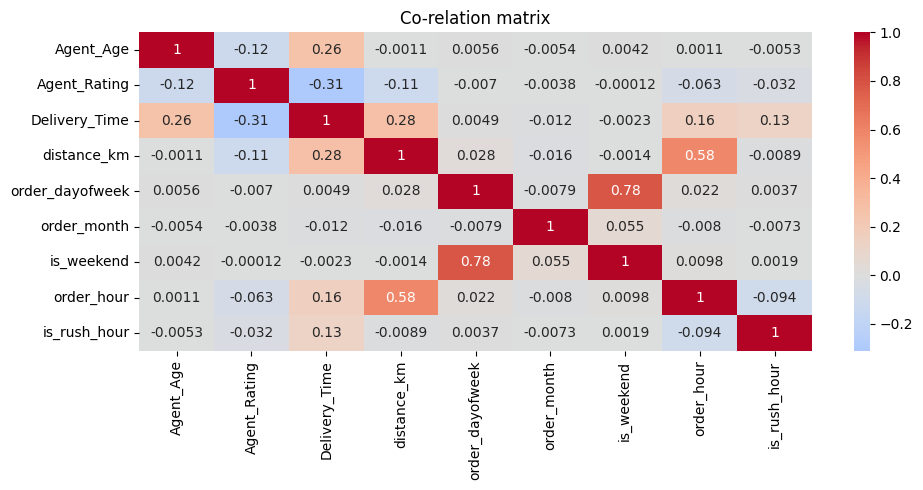

In [64]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Co-relation matrix")
plt.tight_layout()
plt.show()

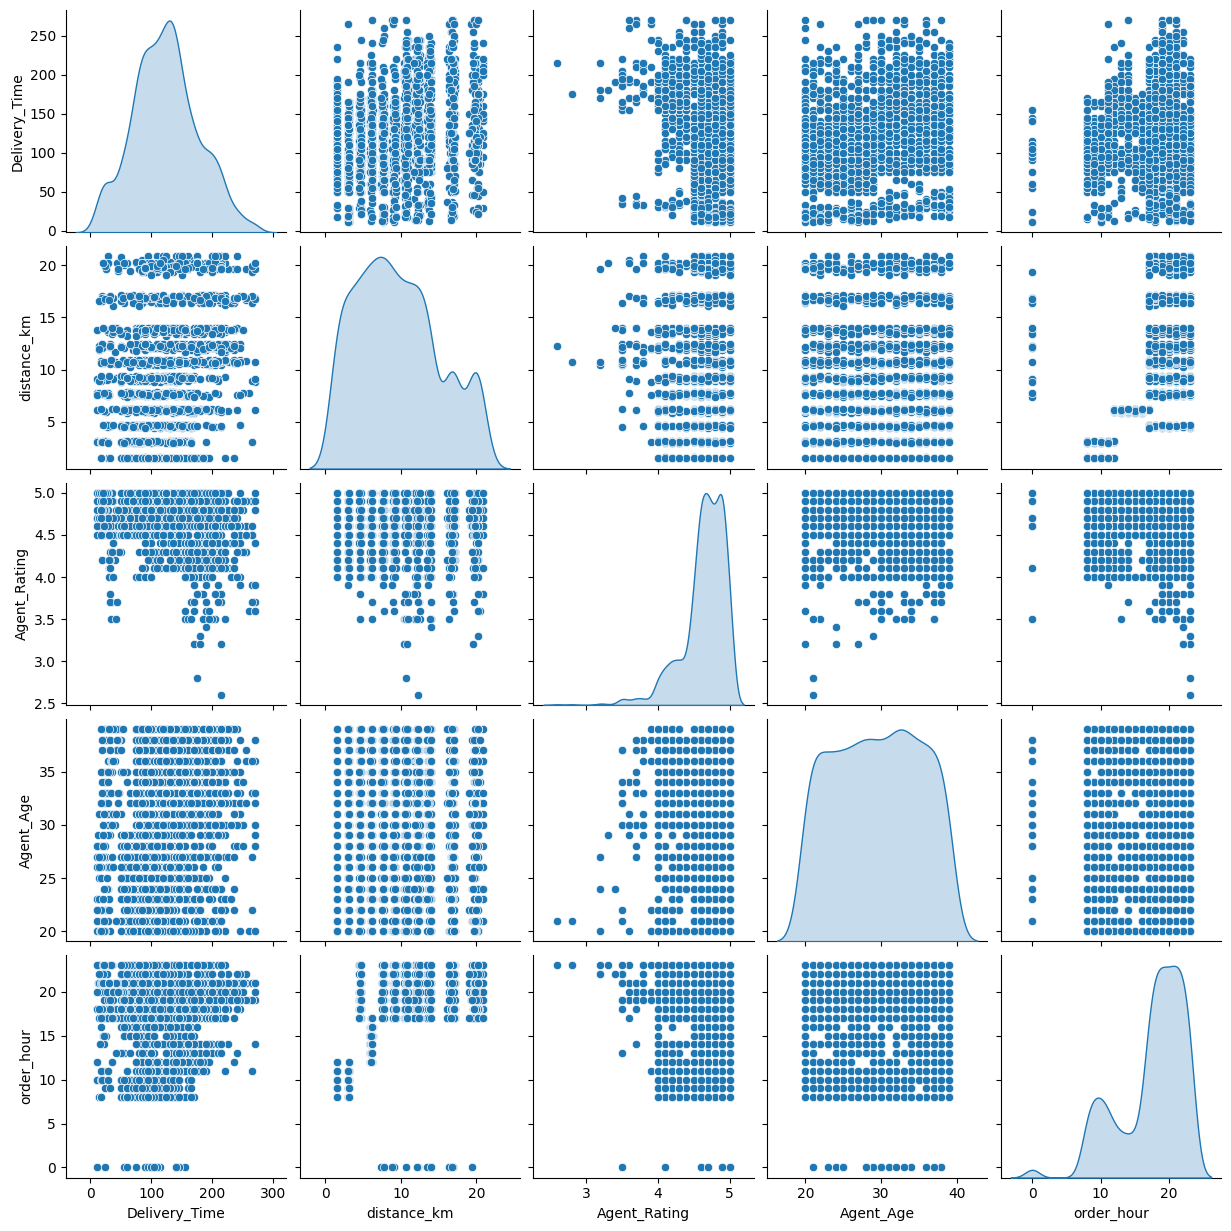

In [70]:
# Pairplots
sns.pairplot(df.sample(2000)[['Delivery_Time', 'distance_km', 'Agent_Rating', 'Agent_Age', 'order_hour']], diag_kind='kde')
plt.show()

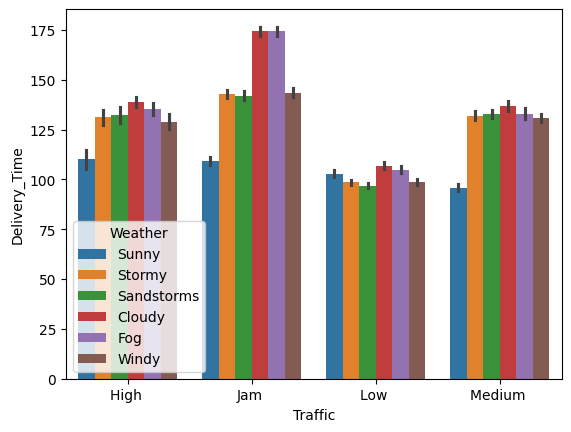

In [71]:
# barplots
sns.barplot(x='Traffic', y='Delivery_Time', hue='Weather', data=df)
plt.show()

## Time-based Patterns

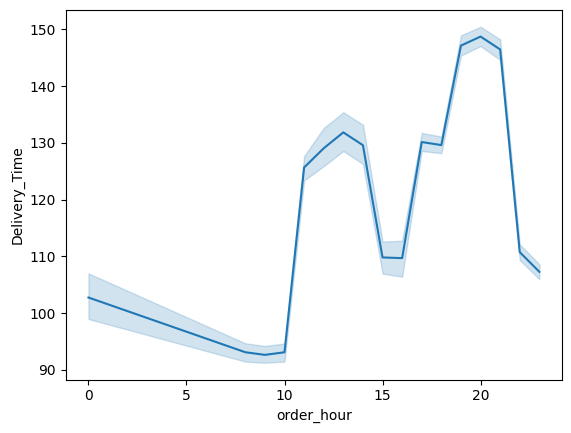

In [76]:
sns.lineplot(data=df, x='order_hour', y='Delivery_Time')
plt.show()

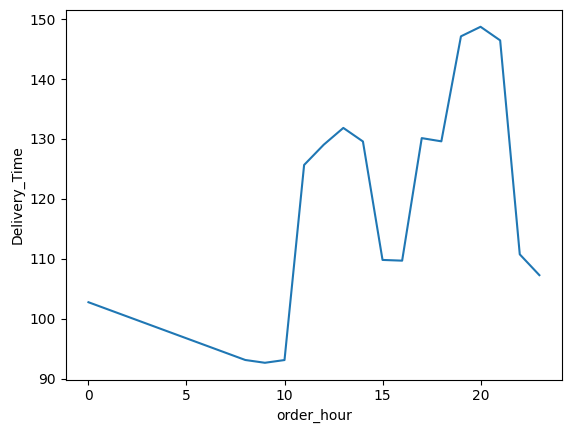

In [86]:
avg_time = df.groupby('order_hour')['Delivery_Time'].mean().reset_index()
sns.lineplot(data=avg_time, x='order_hour', y='Delivery_Time')
plt.show()

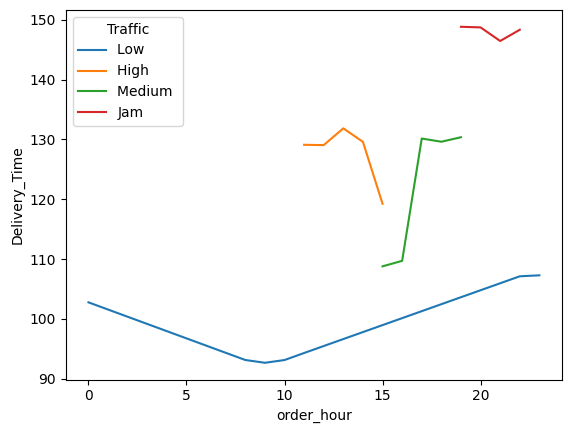

In [87]:
avg_time_traffic = df.groupby(['order_hour', 'Traffic'])['Delivery_Time'].mean().reset_index()
sns.lineplot(data=avg_time_traffic, x='order_hour', y='Delivery_Time', hue='Traffic')
plt.show();

In [89]:
df.columns

Index(['Agent_Age', 'Agent_Rating', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category', 'distance_km', 'order_dayofweek',
       'order_month', 'is_weekend', 'order_hour', 'is_rush_hour'],
      dtype='object')

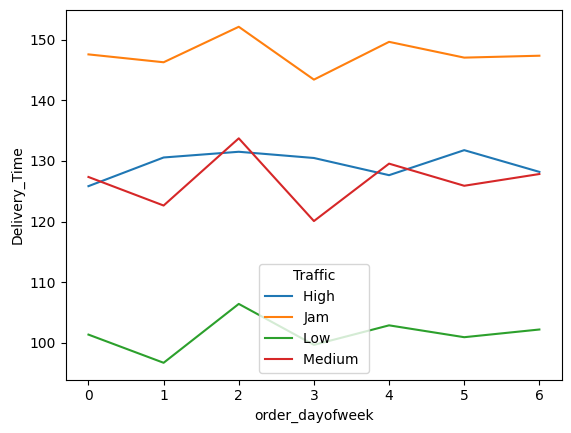

In [92]:
avg_time_week = df.groupby(['order_dayofweek', 'Traffic'])['Delivery_Time'].mean().reset_index()
sns.lineplot(data=avg_time_week, x='order_dayofweek', y='Delivery_Time', hue='Traffic')
plt.show();